## Module 6 - Big Data Concepts

"Big data" is data we cannot handle "normally". That is, data that does not fit on a single computer and/or data that is constantly being added and updated (streaming data). The common attributes of big data include

- Volume (scale of data)
- Velocity (analysis of streaming data)
- Variety (different forms of data such as images, text, etc.)
- Veracity (uncertainty of data)
- Value

### Do we still need statistics with big data? Yes! 

Statisticians usually consider **populations** and **samples** and try to account for the variability in samples as they are related to populations. A population is the group of _all_ units we care about (e.g. all credit card transactions, all people who have a credit card in our company). It's difficult to measure everyone in a population, so statisticians measure a subset of the population (the so-called "sample"). Every sample will be a different subset of the population and will have different values in it. Our job as statisticians is to take the sample and relate it back to the population through _inference_ (i.e. infer something about the population from our samples). The main way to do this is through _hypothesis tests_ and _confidence intervals_.

The way we deal with inference, hypothesis tests, and confidence intervals is by making assumptions about the data-generating processes (e.g. our data will be sampled and we will assume that the population follows a normal distribution). We look at **sampling distributions**, which are the pattern and frequency with which we observe a statistic over the long run. There are many statistics, such as measures of center and spread (mean, median, standard deviation, etc.). Summaries about a population are called **parameters**. 

The most commonly looked-at statistic is the sample mean, $\bar{Y}$. We then try to infer the population mean, $\mu$. The central limit theorem (CLT) tells us that we know the distribution of our sample mean in large samples - $\bar{Y} \sim N(\mu, \frac{\sigma^2}{n})$ (read as "Y bar has a distribution that is normal with mean $\mu$ and variance of sigma squared over n"). We take this sampling distribution idea and we construct a hypothesis test (HT) or we create a confidence interval (CI) to make our inference.

#### Example - sampling distributions

- Population - all customers at a bank
- Parameter (p) - proportion of customers willing to open an additional account (historically 0.15)
- Sample - observe 40 _independent_ customers
- Statistic - sample proportion, $\hat{p}=8/40=0.2$, where 8 customers out of the 40 we asked would open a new account after intervention

Suppose we've done an intervention, whereby we've either changed the structure of the additional accounts to make them more lucrative to people or we're marketing it in a different way. We want to see if $p$ has changed (increased) after our intervention. We want to relate (or infer) our $8/40$ ratio back to the population.   

Question: is the population proportion greater than 0.15?

Answer: one way to answer is to use a hypothesis test and ask if observing $\hat{p}=8/40=0.2$ reasonable of $p=0.15$ is the true proportion.

We can draw samples. In one possible sample, $\hat{p}=8/40$, and in another, $\hat{p}=11/40$. What is the pattern and frequency here? Normally, we'd need to learn sampling theory. However, with Python, we can simulate this experiment many times to understand the sampling distribution of $\hat{p}$.

- Assumptions on our data generating process: 
    - p = 0.15
    - n = 40
    - Independent customers coming in

It turns out that, if we define $Y$ as the number of people (out of the 40) willing to open an account, then a reasonable distribution for $Y$ is a binomial, $Y \sim Bin(n=40, p=0.15)$. The tilde is shorthand for "is distributed".

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [7]:
# Generate random values from different statistical distributions
np.random.seed(5)

# Get random values from a binomial
stats.binom.rvs(n=40, p=0.15, size=1) # size is the number of Y's to draw (i.e. give me 1 draw of 40 people and count the number of people that would open a new account)

array([4])

Above, 4 people out of 40 would open a new account.

In [4]:
stats.binom.rvs(n=40, p=0.15, size=2)

array([9, 4])

Above, in the first run, 9 people said "yes". In the second run, only 4 people said "yes".

These have been actual counts, but we want $\hat{p}$, the proportion.

In [10]:
# Get proportion (p-hat), rather than count
np.random.seed(5)
stats.binom.rvs(n=40, p=0.15, size=1)/40

array([0.1])

In [11]:
stats.binom.rvs(n=40, p=0.15, size=2)/40

array([0.225, 0.1  ])

We can very easily generate $\hat{p}$ values. To generate far more than just 2, we can do the following:

Text(0.5, 1.0, 'Sampling Distribution of p-hat for n=40 and p=0.15')

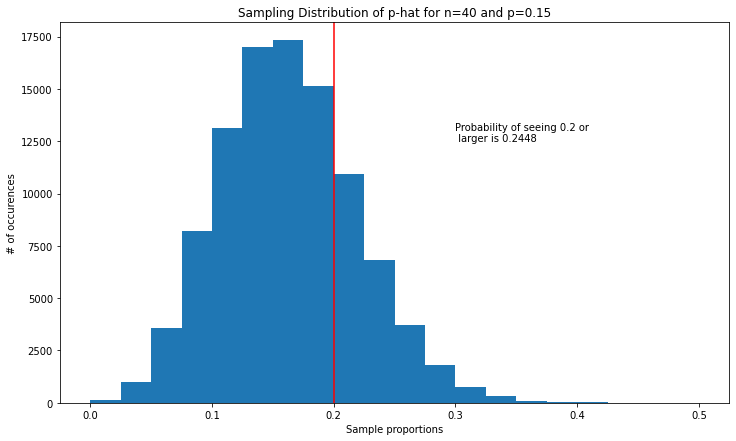

In [12]:
proportion_draws = stats.binom.rvs(n=40, p=0.15, size=100000)/40
plt.figure(figsize=(12,7))
plt.hist(proportion_draws, bins = [x/40 for x in range(0,21)])
plt.axvline(x=8/40, c="Red")
plt.text(
    x=0.3,
    y=12500,
    s = "Probability of seeing 0.2 or \n larger is " + str(round(np.mean(proportion_draws>=0.2), 4))
)
plt.xlabel("Sample proportions")
plt.ylabel("# of occurences")
plt.title("Sampling Distribution of p-hat for n=40 and p=0.15")

In [28]:
type(proportion_draws)

numpy.ndarray

We see that our p-value is 0.2448. Therefore, we do not have much evidence to reject our assumptions on the data-generating process. There's a 25% chance of seeing what we saw (or worse) under the assumptions in our title. What we saw is perfectly reasonable under these assumptions, so we do not have evidence to reject these assumptions.    

Sometimes, we can record every user action...don't we have everything? Is there any variability to consider (i.e. "with enough data, the numbers speak for themselves"). The issues are

1. We don't actually observe everything that would be relevant (did the user mean to click on an ad, or was it clicked by accident?)
2. Superpopulation idea - we have "n=all", such as all of the emails within a company (who's emailing who, the content, etc.). If this day happened again, would those emails go exactly the same? Or, would one person get a call to pick up their child, cancel meetings, and cascade to others? Thus, the one day we actually observed is just a subset of the superpopulation of all possible days we could have observed (i.e. there is day-to-day variability), and we can still make inferences on the data-generating process. 

#### Modeling for n=1

Moreover, with big data, we can now consider user-level (or observational unit level) modeling. In past years, with a population size of $n=1$, we couldn't really do any statistics on it because with statistics, we generally look at variability. If one alien on Mars approached out and it was 4 feet tall, what could we say about the heights of aliens? We have an estimate of how tall the aliens are (4 feet), but we do have any idea about the variability in heights? No! However, as soon as we see a second alien ($n=2$), we now have an idea of the variability between heights.

However, now, even with one unit, we will be able to observe it over time (and still see other units over time also). This allows us to aggregate across people and look at individual user paths as well. Some studies have attempted to model user intention on social media networks to detect depression. There is a baseline model with all status updates analyzed using sentiment analysis (positive and negative words), when statuses are updated, etc.  

#### Rare events in big data

When we have tons and tons of data, even a rare event can happen reasonably often, just by chance.  

##### Independence of events

Two events A and B are independent if the probability of them occurring together is equal to the product of the two individual probabilities - i.e. $P(A \cap B) = P(A)P(B)$. Intuitively, this implies that knowledge of one event tells us nothing about the probability of another.

Is a certain type of coin fair (equal probability of flipping a head and a tail)? Assume $p=P(head)=0.5$. 

Experiment: flip one of these coins 10 times. If 10 heads or 10 tails appear, declare the coin biased.

P(false positive) = P(concluding coin is biased) = P(10 heads) + P(10 tails) = $0.5^{10} + 0.5^{10} = 0.001953125$. This is very rare!

P(10 heads) = P(1st H $\cap$ 2nd H $\cap$ 3rd H $\cap$ ... $\cap$ 10th H) = P(1st H)P(2nd H)...P(10th H) (assuming independence)

Suppose we don't just run this experiment once, but we look at 1000 separate (independent) runs of the experiment. Seeing any 1 coin of the 1000 being declared is quite likely!

P(all 1000 coins identified as fair) = P(1st fair $\cap$ 2nd fair $\cap$...1000th fair) = $(1-0.001953125)^{1000}=0.1416$

P(at least 1 false positive) = P(at least 1 coin of the 1000 is classified as biased) = $1-0.1416 = 0.8584$

We'd actually **expect** (binomial expected value, $n*p$) $1000*0.00195=1.95$ coins to be classified as biased here!

##### Expected numbers

Suppose we have an event that occurs with probability $p$. We run $k$ different **independent** experiments. 

P(at least 1 occurrence) = $1 - (1 - p)^k$

We would expect to see the following number of occurrences of the event:

E(# of occurrences) = $k*p$

##### Example

Suppose you develop an app that screens phone calls for people.

P(Detected|Spam) = 0.99999 (read as "the probability that a call is detected as spam given that it was truly spam")

P(Detected|Not spam) = 0.00002

And, generally, you know that P(Spam) = 0.2, P(Not spam) = 0.8. 

Given a call is detected as spam, what is the probability it wasn't a spam call?

P(Non-spam|Detected) = $\frac{P(Detected|Non-spam)P(Non-spam)}{P(Det|Non-spam)P(Non-Spam)+P(Det|Spam)P(Spam)}$ = $\frac{0.00002*0.8}{0.00002*0.8 + 0.99999*0.2} = 0.00008$ (Bayes theorem)

This is our event of interest! Given that a call is detected as spam, we were wrong. There is a very small probability of occurrence, $p=0.00008$.

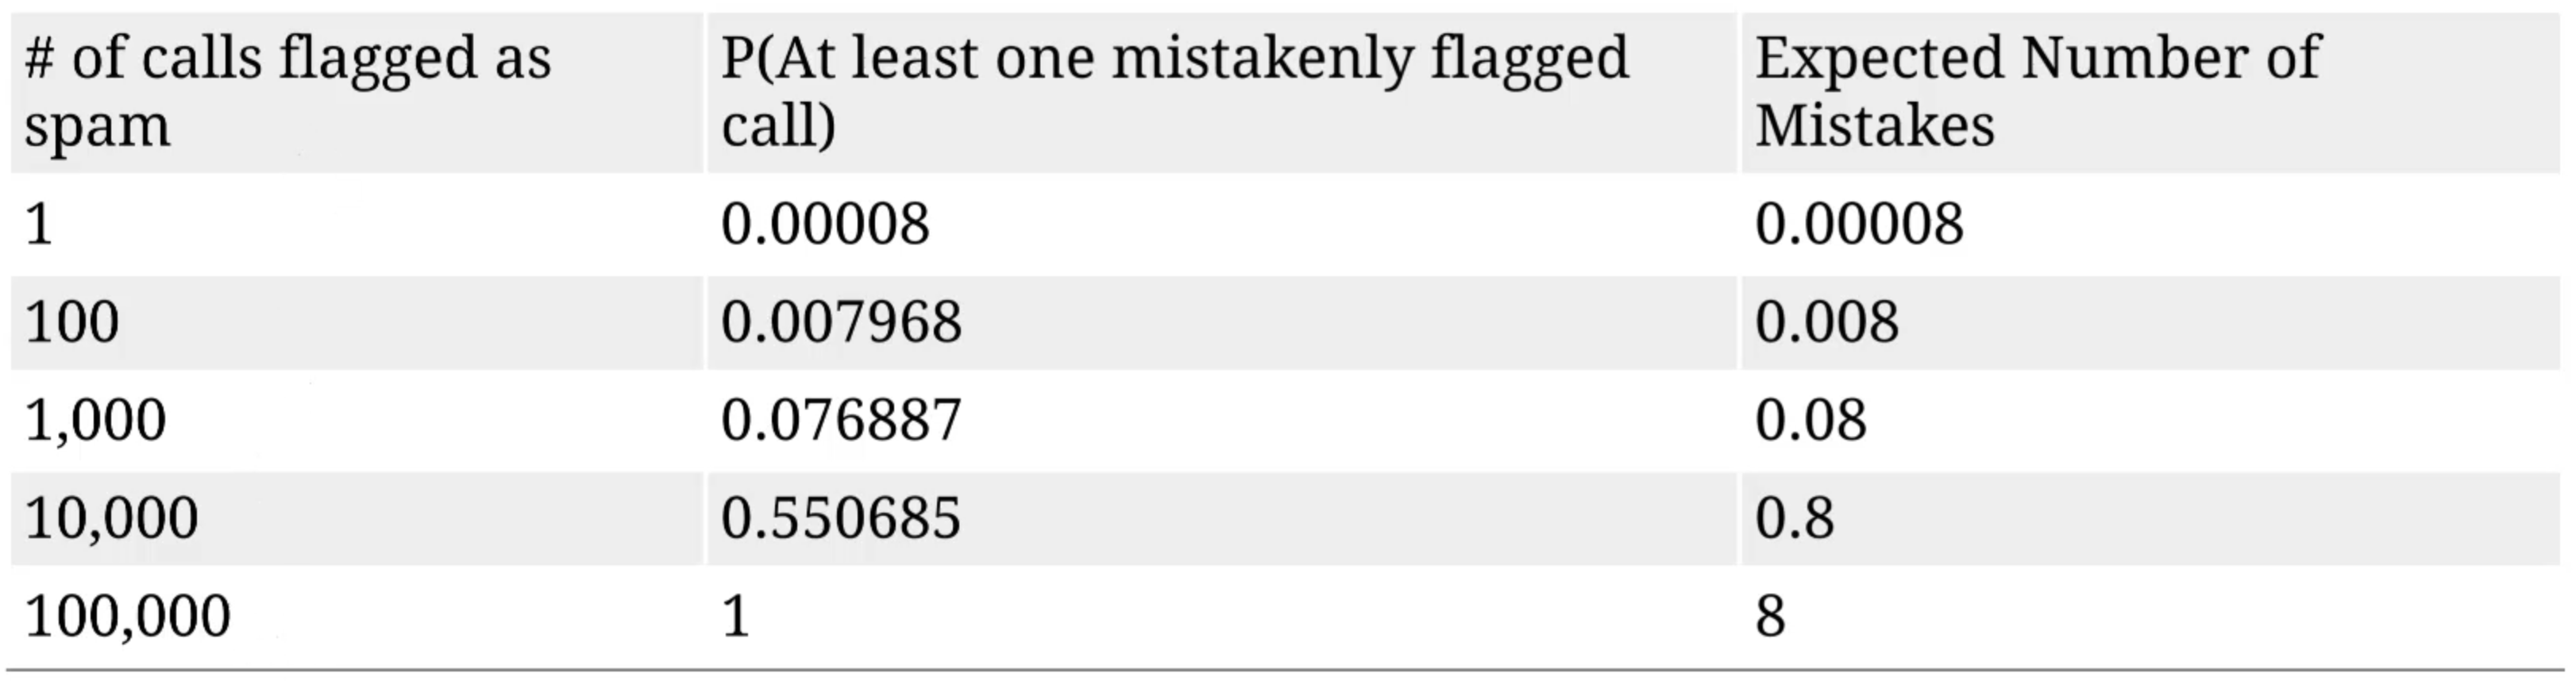

## Module 7 - Databases and SQL

### SQL Basics

We've seen the use of **flat files**, such as .csv, .txt, and .dat, to store data. We also have JSON data (think dictionary) with sub-levels.

When we have _multiple_ data sets or sources, we often use a relational database (with 2-D tables that are related by keys) and a database management system (DBMS). Relational database management system (RDBMS) vendors and products include Oracle, MySQL, SQL Server, PostgreSQL, SQLite, Azure SQL, and more. The data, the DBMS, and their associated applications are often simply called a **database**, and most RDBMS have their own Structured Query Language (SQL). 

#### Actions on databases

CRUD:

- Create data
- Read data
- Update data
- Delete data
- Plus: provide access control, monitoring, tuning, and backup/recovery

Moreover, any "good" database should follow the ACID properties:

- Atomicity - defines all the elements that make up a complete database transaction
- Consistency - defines the rules for maintaining data points in a correct state after a transaction
- Isolation - keeps the effects of a transaction invisible to others until it is committed to avoid confusion
- Durability - ensures that data changes become permanent once the transaction is completed

### Joins

We can create our own databases and do **joins**, which involves combining two or more tables in SQL. There are many types of joins, with the most common ones being:

- `left_join()` - returns all records from the "left" table and any matching records from the "right" table
- `right_join()` - returns all records from the "right" table and any matching records from the "left" table. SQLite does not support a right join, so we must do a left join and switch the tables.
- `inner_join()` - returns records with matching keys in _both_ tables (only keys that match in both tables)
- `full_join()` - returns all records when there is a match from the "left" or "right" table. Not supported in SQLite.
- cross join - returns every combination of rows from the left table and the right table

In [13]:
import sqlite3
import pandas as pd

# Create a temporary database in memory
con = sqlite3.connect(':memory:')
cursor = con.cursor()
cursor.execute("CREATE TABLE IF NOT EXISTS dept (name TEXT, rank TEXT);")

In [14]:
cursor.execute(
    """
    INSERT INTO
        dept (name, rank)
    VALUES
        ("Justin", "Associate"),
        ("Jung-Ying", "Full"),
        ("Arnab", "Associate"),
        ("Spencer", "Full")
    """)

In [15]:
# Return information in a data frame
pd.read_sql("SELECT * FROM dept", con)

,name,rank
0,Justin,Associate
1,Jung-Ying,Full
2,Arnab,Associate
3,Spencer,Full


In [16]:
# Create a second table so we can do joins
cursor = con.cursor()
cursor.execute("CREATE TABLE IF NOT EXISTS seminar (name TEXT, topic TEXT);")

In [17]:
cursor.execute(
    """
    INSERT INTO
        seminar (name, topic)
    VALUES
        ("Jung-Ying", "Genetics"),
        ("Jonathan", "Design"),
        ("Arnab", "ML"),
        ("Dennis", "Non-parametrics")
    """)

In [18]:
pd.read_sql("SELECT * FROM seminar", con)

,name,topic
0,Jung-Ying,Genetics
1,Jonathan,Design
2,Arnab,ML
3,Dennis,Non-parametrics


#### Inner join

In [19]:
inner = """
    SELECT d.name, d.rank, s.topic FROM dept as d
    INNER JOIN seminar as s ON s.name = d.name
    """
pd.read_sql(inner, con)

,name,rank,topic
0,Jung-Ying,Full,Genetics
1,Arnab,Associate,ML


We can also do this with `pandas`.

In [20]:
# Inner join with pandas
pd.merge(
    left = pd.read_sql("SELECT * FROM dept", con),
    right = pd.read_sql("SELECT * FROm seminar", con),
    how = "inner",
    on = "name"
)

,name,rank,topic
0,Jung-Ying,Full,Genetics
1,Arnab,Associate,ML


#### Left join

In [22]:
left = """
    SELECT d.name, d.rank, s.topic FROM dept as d
    LEFT JOIN seminar as s ON s.name = d.name
    """
pd.read_sql(left, con)

,name,rank,topic
0,Justin,Associate,None
1,Jung-Ying,Full,Genetics
2,Arnab,Associate,ML
3,Spencer,Full,None


In [23]:
# With pandas
pd.merge(
    left = pd.read_sql("SELECT * FROM dept", con),
    right = pd.read_sql("SELECT * FROm seminar", con),
    how = "left",
    on = "name"
)

,name,rank,topic
0,Justin,Associate,NaN
1,Jung-Ying,Full,Genetics
2,Arnab,Associate,ML
3,Spencer,Full,NaN


#### Full outer join

In [24]:
# UNION yields everything that's in the left table and right table combined
outer = """
    SELECT d.name, d.rank, s.topic FROM dept as d
        LEFT JOIN seminar as s ON s.name = d.name
    UNION
    SELECT s.name, d.rank, s.topic FROM seminar as s
        LEFT JOIN dept as d ON s.name = d.name
    """
pd.read_sql(outer, con)

,name,rank,topic
0,Arnab,Associate,ML
1,Dennis,None,Non-parametrics
2,Jonathan,None,Design
3,Jung-Ying,Full,Genetics
4,Justin,Associate,None
5,Spencer,Full,None


In [25]:
# With pandas
pd.merge(
    left = pd.read_sql("SELECT * FROM dept", con),
    right = pd.read_sql("SELECT * FROm seminar", con),
    how = "outer",
    on = "name"
)

,name,rank,topic
0,Justin,Associate,NaN
1,Jung-Ying,Full,Genetics
2,Arnab,Associate,ML
3,Spencer,Full,NaN
4,Jonathan,NaN,Design
5,Dennis,NaN,Non-parametrics


#### Cross join

In [26]:
cross = """
    SELECT * FROM dept
        CROSS JOIN seminar
    """
pd.read_sql(cross, con)

,name,rank,name,topic
0,Justin,Associate,Jung-Ying,Genetics
1,Justin,Associate,Jonathan,Design
2,Justin,Associate,Arnab,ML
3,Justin,Associate,Dennis,Non-parametrics
4,Jung-Ying,Full,Jung-Ying,Genetics
5,Jung-Ying,Full,Jonathan,Design
6,Jung-Ying,Full,Arnab,ML
7,Jung-Ying,Full,Dennis,Non-parametrics
8,Arnab,Associate,Jung-Ying,Genetics
9,Arnab,Associate,Jonathan,Design


## Module 8 - Data Storage

### Data flow, data warehouses, and data lakes

A data warehouse is still a database - just of a slightly different kind. 

The main purpose of a data warehouse is to store large amounts of data in a central database and in a standard format. Data can be integrated from many different sources and standardized, so that it is ready for analytics or reporting. 

#### Databases vs. data warehouses

Databases like SQLite use Online Transactional Processing (OLTP) to insert, replace, update, or delete records quickly. OLTP is optimized to add, modify, or delete many records (e.g. buying something at a store). 

Data warehouses, on the other hand, are not optimized for writing. They use Online Analytical Processing (OLAP) to analyze large amounts of data quickly and are optimized to execute a smaller number of complex queries. 

Databases have a _highly structured schema_ (metadata about how the database is set up) and _normalized data_ (data that is de-duplicated, so as not to be repeated in multiple locations). Data warehouses have structured schema and denormalized data (i.e. some of the data is repeated across tables) ready for dashboards and analytics. 

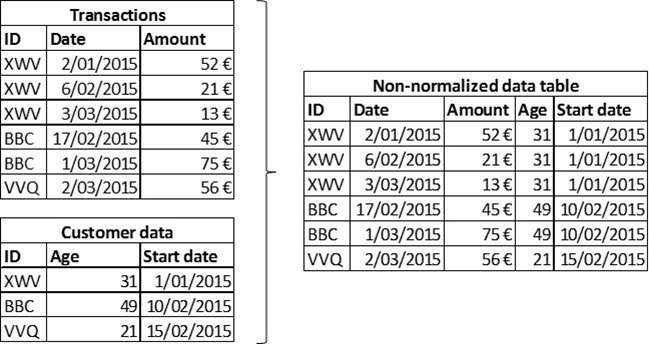

(https://www.dataminingapps.com/2017/07/what-is-meant-by-denormalizing-data-for-analytics/)

#### Data marts and MDM

Data marts are _focused_ versions of a data warehouse for special teams or departments. 

Master Data Management (MDM) is another data source that incorporates information about all master data sources. An MDM provides a single consistent view of all business entitities' information and serves as a "gold standard" for that information. 

### Data flow for big data

With big data, our data is often stored in a **data lake**. A data lake is a place for storing raw data (structured, semi-structured, or unstructured) until it is needed (schema is defined on read). Extract, transform, load (ETL) is then done on the data to prepare it for use. The data may be placed into a database or a data warehouse within the data lake.  

The flexibility of data lakes can also cause problems. Data can become messy and result in a **data swamp**, where data is not well tagged or lacks structure (no data governance, broken ingestion process, broken metadata management).

#### Data sources

Data ingestion can happen via a batch or a streaming process.

- Batch: data is updated in bulk, say once each day at 3:00 AM.
- Streaming: data is updated in "real-time". Jobs run 24/7, waiting for new events to be published. 

#### Lake house

There is an intermediary between the unstructured data lake and the very structured database/data warehouse. Delta Lake storage technology can power the lake house and guarantee ACID transactions.

### How big data is stored (HDFS)

Hadoop is a framework for efficiently storing and processing large data sets. It allows multiple computers to cluster and analyze data sets in parallel. The base Apache Hadoop framework consists of

- Hadoop Distributed Filesystem (HDFS): a distributed file system that stores data across machines
- Hadoop YARN: a platform responsible for managing computing resources in cluster and using them to schedule users' applications
- Hadoop MapReduce: an implementation of the MapReduce programming model for large-scale data processing
- Hadoop Common: contains libraries and utilities needed by other Hadoop modules

#### Hadoop MapReduce

MapReduce is a programming paradigm that enables massive scalability across hundreds or thousands of servers in a Hadoop cluster. It 

- leverages parallel computing
    - i.e. takes computations that can be done independently, runs those computations simultaneously on different processor cores across many connected computers, and combines the results 
    
The idea behind MapReduce is to:

- consider different chunks of data to be analyzed (splitting)
- use a `map` function to turn each chunk into zero or more key-value pairs (mapping)
- collect together all pairs with the same keys (shuffling)
- **reduce** each collection of grouped values to produce an output for the corresponding key (reducing)

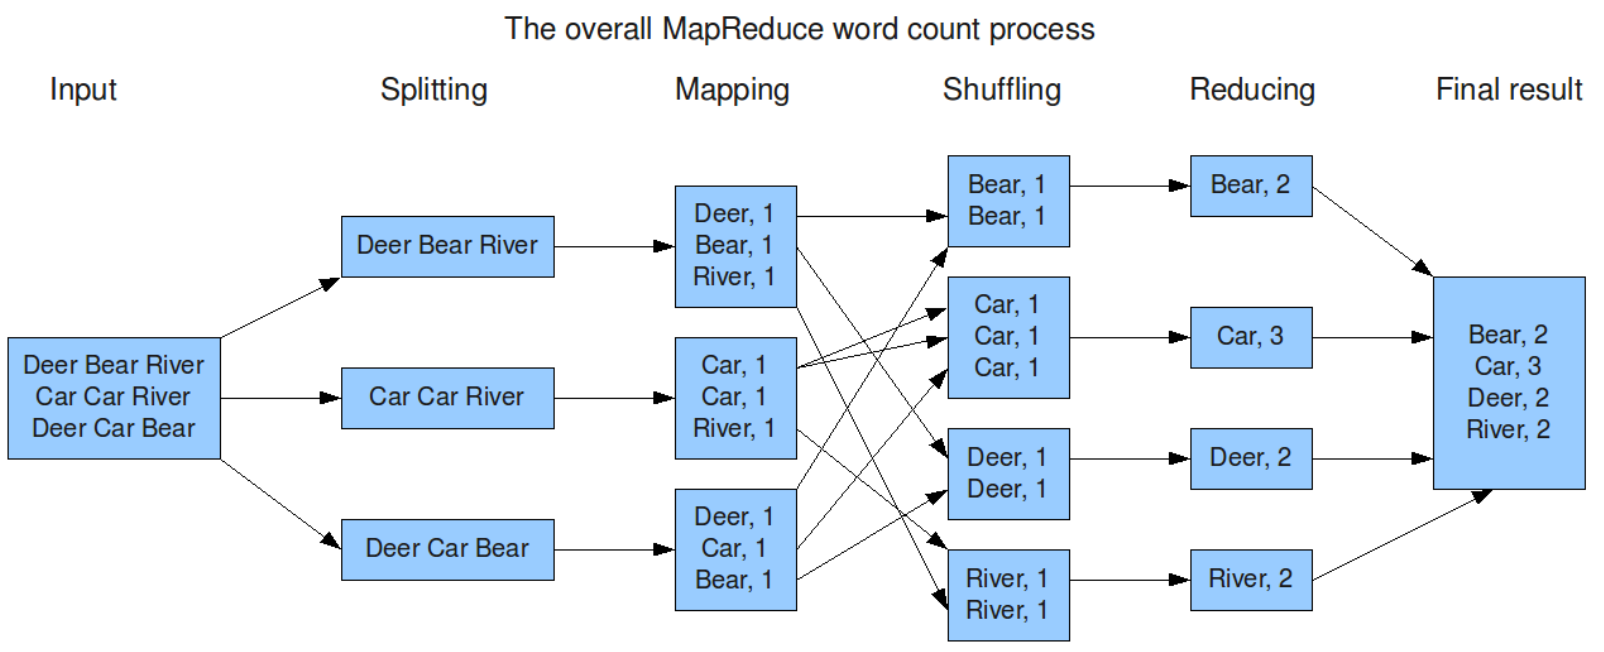


#### MapReduce example

We can take a text document and create a dictionary with words as keys and counts as values. This is the _map_ part.

Next, we can use this map function across multiple text documents in parallel. We can combine the resulting dictionaries by summing counts across the words. This is the _reduce_ part.

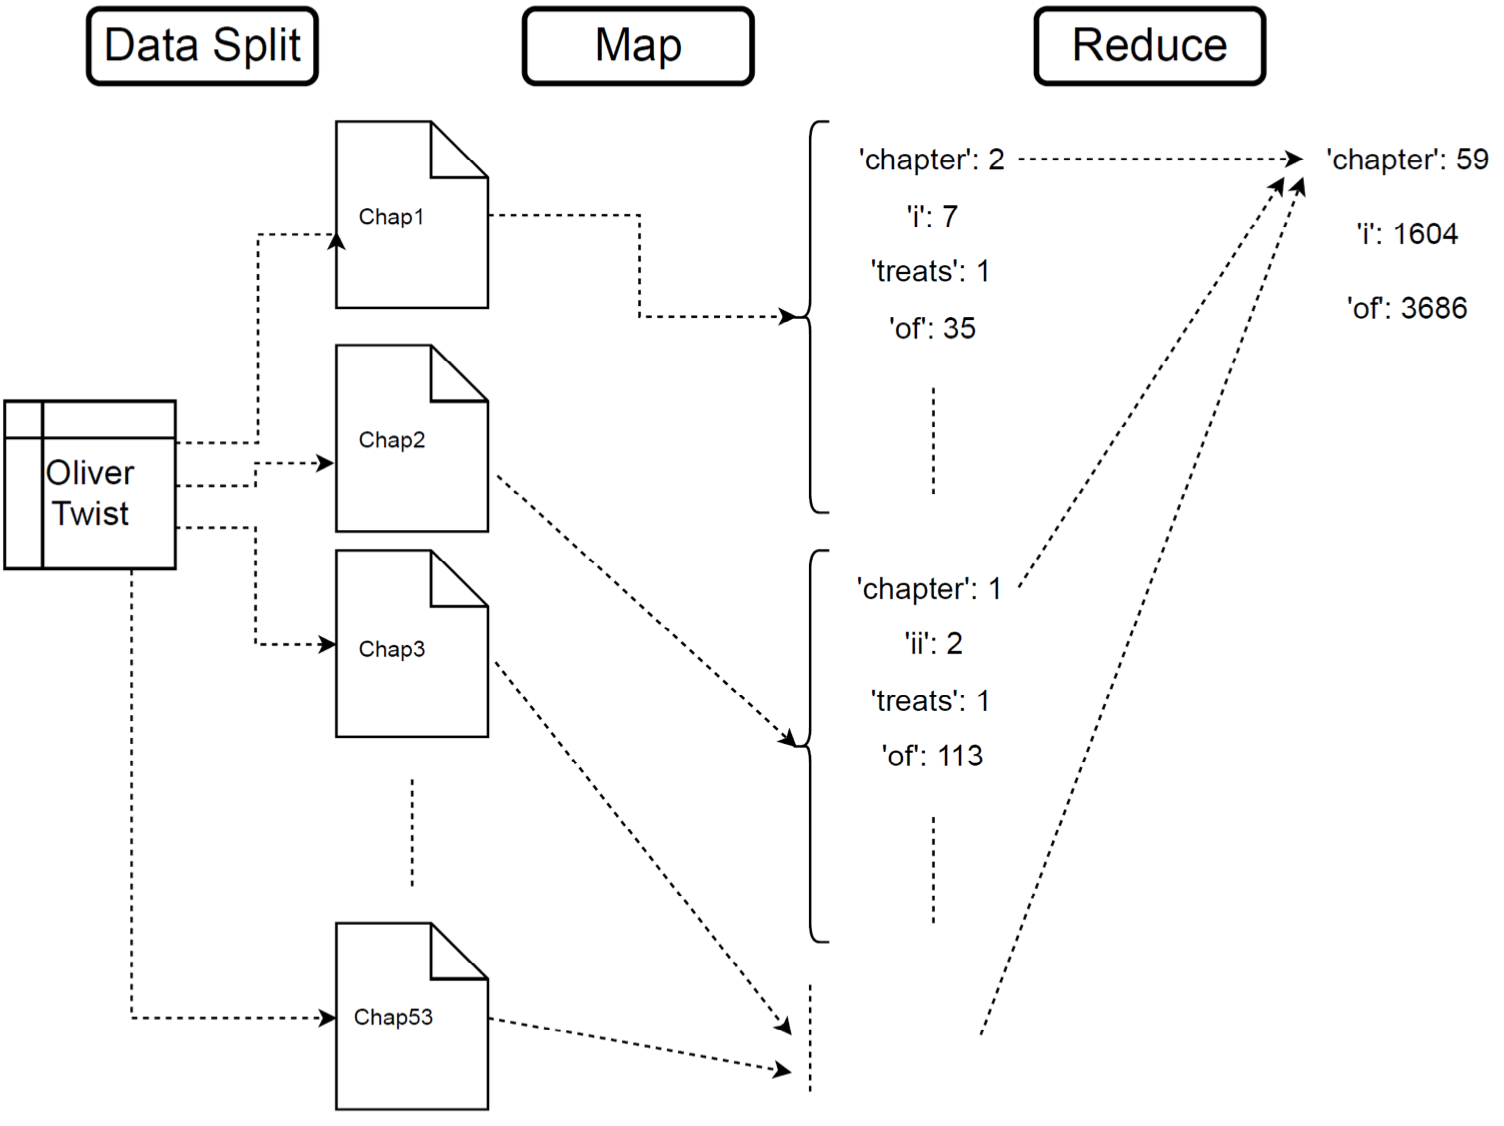

First, we will define helper functions (a good idea, generally). 

In [2]:
import string

# Create a helper function to find the different chapters within the full text.
# "lines" is the entire text of the document in a string
# "string" is the string to search for in the text
def find_chap(lines, string):
    chap_start = lines.find(string) # finds the index of the "lines" object that matches our "string"
    chap_end = lines.find(string, chap_start+1) # start string of the next "Chapter"
    # when we get to the last chapter, there are no more "Chapter"s to search for, and chap_end will return a -1 when it doesn't find anything
    if chap_end == -1: # if we can't find a "Chapter" at the end...
        chap_end = lines.find("End of the Project Gutenberg EBook") # find this string instead, because it signals the end of the book
    return([chap_start, chap_end]) # returns the indices corresponding to our chapters

# Helper function to remove punctuation.
def remove_char(lines):
    for symbol in string.punctuation: # bring in the "punctuation" from the "string" module we imported
        lines = lines.replace(symbol, "") # replace any punctuation with empty text
    lines = lines.replace("\n", " ") # replace line returns with a space
    return(lines) # return the cleaned up text

In [3]:
# Write a function to save each chapter into a particular file
def save_chap(lines, chap = None): # takes text as a string, "chap" is the chapter we want to look for
    if chap == None:
        start_end = find_chap(lines, "CHAPTER I") # since there are 2 occurences of "Chapter" in the beginning, we want to specify "Chapter I" explicitly
        chap = 1
    else:
        start_end = find_chap(lines, "CHAPTER") # returns 2 things - [chap_start, chap_end]
    # get the chapter and turn it to lower case
    chap_text = lines[start_end[0]:start_end[1]].lower() # grab the chap_start and chap_end (as mentioned above) and turn all text between them to lower case
    # remove punctuation
    chap_text = remove_char(chap_text)
    with open('chap' + str(chap) + '.txt', 'w') as w: # write to a text file
        w.write(chap_text)
    chap += 1
    if lines[(start_end[1] + 1):].find("CHAPTER") == -1: # if we've reached the end...
        return # return nothing
    else: # if there IS a chapter that was found in the rest of the text
        save_chap(lines[start_end[1]:], chap = chap) # run the save_chap function again but not on the full data set - just on the remaining portions
        
# read in the book as a string
with open('charles-dickens-oliver-twist.txt', 'r') as f:
    my_lines = f.read()
save_chap(my_lines)

Now that we have our data split up into 53 different text files, we can take in one of the chapters and count the words (our mapping function).

In [5]:
# Helper function to take in a particular chapter
def map_words(chap):
    word_count_dictionary = {}   # create an empty dictionary
    chap_split = chap.split(" ") # split the words by empty spaces
    for word in chap_split:
        if word in word_count_dictionary:
            word_count_dictionary[word] += 1
        else:
            word_count_dictionary[word] = 1
    return word_count_dictionary

with open('chap1.txt', 'r') as f:
    my_chap = f.read()

counted = map_words(my_chap)
for vals in list(counted.items())[:4]: # items() returns keys and values as a tuple, we'll print just the first four
    print(vals)

('chapter', 2)
('i', 7)
('', 40)
('treats', 1)


We can do this across all 53 text documents by constructing an iterable with all of the chapters and mapping our function to each chapter. This could be parallelized across the chapters, yielding 53 dictionaries.

In [6]:
my_chap = []
for i in range(1, 54):
    with open('chap' + str(i) + '.txt', 'r') as f:
        my_chap.append(f.read())

# map() takes a function and applies it to each element of an iterable
mapped = list(map(map_words, my_chap)) # turn the result into a list, rather than keeping it as a basic map object
for key, value in mapped[0].items(): # look at just Chapter 1 (mapped[0])
    print(key, ":", value)

chapter : 2
i : 7
 : 40
treats : 1
of : 35
the : 75
place : 2
where : 4
oliver : 9
twist : 3
was : 17
born : 3
and : 35
circumstances : 1
attending : 1
his : 11
birth : 1
among : 1
other : 1
public : 1
buildings : 1
in : 22
a : 33
certain : 1
town : 1
which : 10
for : 7
many : 1
reasons : 1
it : 13
will : 3
be : 5
prudent : 1
to : 27
refrain : 1
from : 5
mentioning : 1
assign : 1
no : 5
fictitious : 1
name : 3
there : 3
is : 8
one : 2
anciently : 1
common : 1
most : 4
towns : 1
great : 2
or : 5
small : 1
wit : 1
workhouse : 4
this : 9
on : 10
day : 1
date : 1
need : 1
not : 4
trouble : 2
myself : 1
repeat : 1
inasmuch : 1
as : 8
can : 2
possible : 1
consequence : 1
reader : 1
stage : 1
business : 1
at : 4
all : 5
events : 1
item : 1
mortality : 1
whose : 1
prefixed : 1
head : 4
long : 3
time : 4
after : 2
ushered : 1
into : 2
world : 2
sorrow : 1
by : 11
parish : 4
surgeon : 7
remained : 1
matter : 1
considerable : 2
doubt : 1
whether : 1
child : 6
would : 6
survive : 1
bear : 1
any : 

We now need to reduce these into 1 dictionary with all key-value pairs.

In [10]:
# Combine dictionary for chapter 1 with dictionary for chapter 2 into 1 dictionary with
# all key-value pairs
def word_reduce(dict1, dict2):
    combined = {}
    for key in dict1.keys():
        if key in dict2:
            combined[key] = dict1[key] + dict2[key]
        else:
            combined[key] = dict1[key]
    for key in dict2.keys():
        if key not in dict1.keys():
            combined[key] = dict2[key]
    return combined

We can check that this function works.

In [11]:
with open('chap1.txt', 'r') as f:
    my_chap = f.read()
counted1 = map_words(my_chap)

with open('chap2.txt', 'r') as f:
    my_chap = f.read()
counted2 = map_words(my_chap)

temp = word_reduce(counted1, counted2)
for key, value in temp.items():
    print(key, ":", value)

chapter : 3
i : 39
 : 214
treats : 2
of : 148
the : 332
place : 4
where : 10
oliver : 47
twist : 13
was : 95
born : 3
and : 153
circumstances : 1
attending : 1
his : 51
birth : 1
among : 1
other : 8
public : 4
buildings : 1
in : 93
a : 165
certain : 2
town : 1
which : 30
for : 46
many : 4
reasons : 1
it : 55
will : 11
be : 28
prudent : 1
to : 120
refrain : 1
from : 13
mentioning : 2
assign : 1
no : 21
fictitious : 1
name : 7
there : 13
is : 18
one : 15
anciently : 1
common : 1
most : 7
towns : 1
great : 18
or : 32
small : 7
wit : 1
workhouse : 13
this : 33
on : 29
day : 6
date : 1
need : 2
not : 17
trouble : 2
myself : 2
repeat : 2
inasmuch : 1
as : 30
can : 2
possible : 3
consequence : 3
reader : 1
stage : 1
business : 5
at : 35
all : 19
events : 1
item : 1
mortality : 1
whose : 2
prefixed : 1
head : 9
long : 7
time : 9
after : 9
ushered : 2
into : 15
world : 4
sorrow : 1
by : 29
parish : 14
surgeon : 8
remained : 1
matter : 3
considerable : 2
doubt : 1
whether : 6
child : 13
would : 

We can run this function across all 53 chapters using `functools.reduce()`! Recall that `reduce()` takes in a function of two variables and an iterable, applies the function repetitively over the iterable, and returns the result. 

In [12]:
import functools
functools.reduce(lambda x, y: x + y, range(1, 11)) # sum of first 10 numbers

55

In our case,

In [13]:
# word_reduce is a function with 2 arguments
# mapped is a list (an iterable) of dictionaries
final = functools.reduce(word_reduce, mapped)
for key, val in list(final.items())[:10]:
    print(key, ":", val)

chapter : 59
i : 1604
 : 7654
treats : 4
of : 3686
the : 9272
place : 111
where : 178
oliver : 727
twist : 54
